# TS plots of each model and their differences between WOA 1981-2010

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import gsw
from fastjmd95 import jmd95numba

In [2]:
woa_8110 = xr.open_dataarray('/home/jovyan/WMT-project/WOA/ts_hist_8110.nc')
woa_0517 = xr.open_dataarray('/home/jovyan/WMT-project/WOA/ts_hist_0517.nc')
#from ts-plot-ecco.ipynb
ecco = xr.open_dataarray('/home/jovyan/WMT-project/ECCO-budgets/ts_hist_mean_ECCO.nc')
sose = xr.open_dataarray('/home/jovyan/WMT-project/SOSE-budgets/ts_hist_mean_SOSE.nc')
soda = xr.open_dataarray('/home/jovyan/WMT-project/SODA/ts_hist_mean_SODA.nc')

# <span style='background :yellow'> TS plots of models and WOA </span>

NameError: name 'sigma2' is not defined

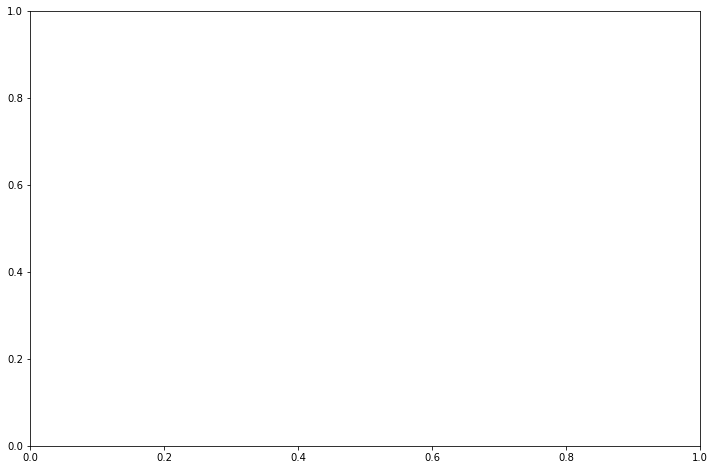

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sigma_levs = np.arange(1032, 1037.5, 0.25)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax)
plt.clabel(C)
diff_ecco_woa8110.where(diff_ecco_woa8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                                  cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

ax.set_xlabel('Salinity [g/kg]')
ax.set_ylabel('Potential Temperature [˚C]')
ax.set_title('Difference between \n ECCO (1992-2016) and WOA (1981-2010)', fontsize=20);
ax.set_xlim(33, 35)
ax.set_ylim(-2, 4)
plt.savefig('ts-plot-ecco-woa8110.pdf');

**Testing to see if salt/theta bins are equal for each model**

In [12]:
import numpy as np

In [13]:
np.testing.assert_array_equal(ecco.salt_bin, sose.salt_bin)

In [14]:
np.testing.assert_array_equal(sose.salt_bin, soda.salt_bin)

In [15]:
np.testing.assert_array_equal(ecco.theta_bin, sose.theta_bin)

In [16]:
np.testing.assert_array_equal(sose.theta_bin, soda.theta_bin)

In [17]:
#Since salt/theta bins are equal just use one of the models to define sigma
sigma2 = jmd95numba.rho(ecco.salt_bin, ecco.theta_bin, 2000.)

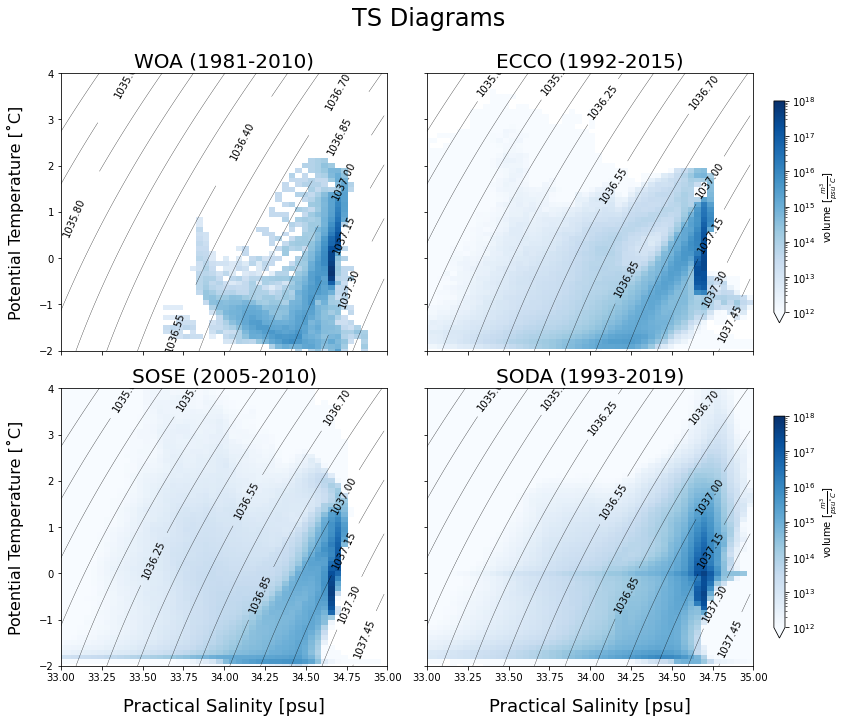

In [105]:
fig, ax = plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True, gridspec_kw={'width_ratios': [2, 2.5]})
sigma_levs = np.arange(1035.5, 1037.5, 0.15)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0,0])
ax[0,0].clabel(C)
woa_8110.where(woa_8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18, add_colorbar=False, ax=ax[0,0])
ax[0,0].set_title('WOA (1981-2010)', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Potential Temperature [˚C]', fontsize=16, labelpad=15)
ax[0,0].set_xlim(33, 35)
ax[0,0].set_ylim(-2, 4)

C1 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0,1])
ax[0,1].clabel(C1)
ecco.where(ecco>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=ax[0,1])
ax[0,1].set_title('ECCO (1992-2015)', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_xlim(33, 35)
ax[0,1].set_ylim(-2, 4)

C2 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1,0])
ax[1,0].clabel(C2)
sose.where(sose>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        add_colorbar=False, ax=ax[1,0])
ax[1,0].set_title('SOSE (2005-2010)', fontsize=20)
ax[1,0].set_xlabel('Practical Salinity [psu]', fontsize=18, labelpad=15)
ax[1,0].set_ylabel('Potential Temperature [˚C]', fontsize=16, labelpad=15)
ax[1,0].set_xlim(33, 35)
ax[1,0].set_ylim(-2, 4)

C3 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1,1])
ax[1,1].clabel(C3)
soda.where(soda>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=ax[1,1])
ax[1,1].set_title('SODA (1993-2019)', fontsize=20)
ax[1,1].set_xlabel('Practical Salinity [psu]', fontsize=18, labelpad=15)
ax[1,1].set_ylabel('')
ax[1,1].set_xlim(33, 35)
ax[1,1].set_ylim(-2, 4)

plt.suptitle('TS Diagrams', fontsize=24, y=1)
plt.tight_layout()
plt.savefig('ts-plots.pdf');

# <span style='background :yellow'> TS plots of difference between models and WOA </span>

In [64]:
diff_ecco_woa8110 = ecco - woa_8110
diff_sose_woa8110 = sose - woa_8110
diff_soda_woa8110 = soda - woa_8110

## <span style='color:Purple'> Semi-Log Scale
using `SymLogNorm()` --> have to specify `linthresh` parameter - below this absolute value the colormap is linear, and outside the ± bounds cmap is logarithmic.

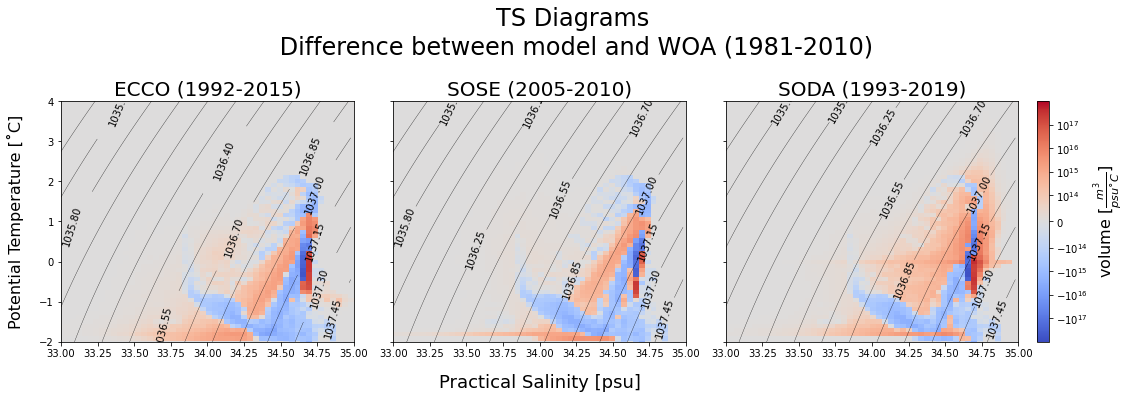

In [106]:
fig, ax = plt.subplots(1,3, figsize=(16,5.5), sharex=True, sharey=True, gridspec_kw={'width_ratios': [2, 2, 2.5]})
sigma_levs = np.arange(1035.5, 1037.5, 0.15)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0])
ax[0].clabel(C)
diff_ecco_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                       add_colorbar=False, ax=ax[0])
ax[0].set_title('ECCO (1992-2015)', fontsize=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('Potential Temperature [˚C]', fontsize=16, labelpad=15)
ax[0].set_xlim(33, 35)
ax[0].set_ylim(-2, 4)

C1 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1])
ax[1].clabel(C1)
diff_sose_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                       add_colorbar=False, ax=ax[1])
ax[1].set_title('SOSE (2005-2010)', fontsize=20)
ax[1].set_xlabel('Practical Salinity [psu]', fontsize=18, labelpad=15)
ax[1].set_ylabel('')
ax[1].set_xlim(33, 35)
ax[1].set_ylim(-2, 4)

C2 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[2])
ax[2].clabel(C2)
t = diff_soda_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                           add_colorbar=False, ax=ax[2])
fig.colorbar(t).set_label(r'volume [$\frac{m^3}{psu ˚C}$]', fontsize=16)
ax[2].set_title('SODA (1993-2019)', fontsize=20)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_xlim(33, 35)
ax[2].set_ylim(-2, 4)

plt.suptitle('TS Diagrams\n Difference between model and WOA (1981-2010)', fontsize=24, y=1)
plt.tight_layout()
plt.savefig('ts-plots-diffs.pdf');